<a href="https://colab.research.google.com/github/Alfrecasu/Laboratorio_1_Python_Pandas_Matplotlib/blob/main/Laboratorio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Instalación de Librerías

In [ ]:
!pip install pandas numpy matplotlib seaborn

# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import io
from google.colab import files

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Librerías importadas correctamente")

Librerías importadas correctamente


## 2. ETL - Extracción, Transformación y Carga

### 2.1 Extracción

In [ ]:
from google.colab import files

# Script para carga de archivos
# from google.colab import files
# uploaded = files.upload()

# Script para carga de archivos
# Se solicita al usuario subir los archivos necesarios
print("SUBIR ARCHIVOS CSV:")
print("1. tipos-de-cambio-historicos.csv")
print("2. remuneracion-bruta-asalariados-registrados-sector-privado-mensual-pesos-base-2009.csv")
print("3. Canasta_Basica-alimentaria-gba-valores-trimestrales-pesos-corrientes-desde-1988.csv")
uploaded = files.upload() # Única llamada a files.upload()

# Obtener las claves reales de los archivos subidos
uploaded_keys = list(uploaded.keys())

dolar_key = None
salarios_key = None
canasta_key = None

# Buscar las claves que contengan los nombres base esperados
for key in uploaded_keys:
    if 'tipos-de-cambio-historicos' in key:
        dolar_key = key
    elif 'remuneracion-bruta-asalariados-registrados-sector-privado-mensual-pesos-base-2009' in key:
        salarios_key = key
    elif 'Canasta_Basica-alimentaria-gba-valores-trimestrales-pesos-corrientes-desde-1988' in key:
        canasta_key = key

# Cargar datasets individuales usando las claves correctas
if dolar_key and salarios_key and canasta_key:
    # Ensure pandas is imported as pd before this line
    import pandas as pd # Re-import pandas here to ensure 'pd' is defined
    import io
    df_dolar = pd.read_csv(io.BytesIO(uploaded[dolar_key]))
    df_salarios = pd.read_csv(io.BytesIO(uploaded[salarios_key]))
    df_canasta = pd.read_csv(io.BytesIO(uploaded[canasta_key]))
else:
    raise ValueError("No se encontraron todos los archivos esperados. Por favor, asegúrese de subir los tres archivos y revise sus nombres.")

print("✅ Datasets cargados:")
print(f"   • Dólar: {df_dolar.shape}")
print(f"   • Salarios: {df_salarios.shape}")
print(f"   • Canasta: {df_canasta.shape}")

SUBIR ARCHIVOS CSV:
1. tipos-de-cambio-historicos.csv
2. remuneracion-bruta-asalariados-registrados-sector-privado-mensual-pesos-base-2009.csv
3. Canasta_Basica-alimentaria-gba-valores-trimestrales-pesos-corrientes-desde-1988.csv


Saving tipos-de-cambio-historicos.csv to tipos-de-cambio-historicos.csv
Saving Canasta_Basica-alimentaria-gba-valores-trimestrales-pesos-corrientes-desde-1988.csv to Canasta_Basica-alimentaria-gba-valores-trimestrales-pesos-corrientes-desde-1988.csv
Saving remuneracion-bruta-asalariados-registrados-sector-privado-mensual-pesos-base-2009.csv to remuneracion-bruta-asalariados-registrados-sector-privado-mensual-pesos-base-2009.csv
✅ Datasets cargados:
   • Dólar: (20358, 1)
   • Salarios: (367, 3)
   • Canasta: (25, 5)


### 2.2 Transformación

#### Dataset Dolar

In [ ]:
# Análisis inicial de cada dataset

print("ANÁLISIS INICIAL DATASET DOLAR:")
df_dolar.info()
df_dolar.head()

ANÁLISIS INICIAL DATASET DOLAR:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20358 entries, 0 to 20357
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                   --------------  ----- 
 0   indice_tiempo;dolar_tipo_unico;dolar_finan_esp_compra;dolar_finan_esp_venta;dolar_financiero_compra;dolar_financiero_venta;dolar_libre_compra;dolar_libre_venta;dolar_oficial_compra;dolar_oficial_venta;dolar_estadounidense;dolar_referencia_com_3500  20358 non-null  object
dtypes: object(1)
memory usag

,indice_tiempo;dolar_tipo_unico;dolar_finan_esp_compra;dolar_finan_esp_venta;dolar_financiero_compra;dolar_financiero_venta;dolar_libre_compra;dolar_libre_venta;dolar_oficial_compra;dolar_oficial_venta;dolar_estadounidense;dolar_referencia_com_3500
0,5/1/1970;35;;;;;;;;;;
1,6/1/1970;35;;;;;;;;;;
2,7/1/1970;35;;;;;;;;;;
3,8/1/1970;35;;;;;;;;;;
4,9/1/1970;35;;;;;;;;;;


In [ ]:
# print("TRANSFORMANDO DATASET DÓLAR - SEPARANDO COLUMNAS...")

# Paso 1: Separar la única columna en múltiples columnas usando ";"
df_dolar_separado = df_dolar['indice_tiempo;dolar_tipo_unico;dolar_finan_esp_compra;dolar_finan_esp_venta;dolar_financiero_compra;dolar_financiero_venta;dolar_libre_compra;dolar_libre_venta;dolar_oficial_compra;dolar_oficial_venta;dolar_estadounidense;dolar_referencia_com_3500'].str.split(';', expand=True)

# Paso 2: Asignar nombres correctos a las columnas
nombres_columnas = [
    'fecha', 'dolar_tipo_unico', 'dolar_finan_esp_compra', 'dolar_finan_esp_venta',
    'dolar_financiero_compra', 'dolar_financiero_venta', 'dolar_libre_compra',
    'dolar_libre_venta', 'dolar_oficial_compra', 'dolar_oficial_venta',
    'dolar_estadounidense', 'dolar_referencia_com_3500'
]

df_dolar_separado.columns = nombres_columnas

# Paso 3: Ver el resultado
print("Dataset después de separar columnas:")
print(f"Dimensiones: {df_dolar_separado.shape}")

#print("\nPrimeras filas:")
#print(df_dolar_separado.head())

#print("\nÚltimas filas:")
#print(df_dolar_separado.tail())

print("\n Info después de la separación:")
df_dolar_separado.info()

Dataset después de separar columnas:
Dimensiones: (20358, 12)

 Info después de la separación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20358 entries, 0 to 20357
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   fecha                      20358 non-null  object
 1   dolar_tipo_unico           20358 non-null  object
 2   dolar_finan_esp_compra     20358 non-null  object
 3   dolar_finan_esp_venta      20358 non-null  object
 4   dolar_financiero_compra    20358 non-null  object
 5   dolar_financiero_venta     20358 non-null  object
 6   dolar_libre_compra         20358 non-null  object
 7   dolar_libre_venta          20358 non-null  object
 8   dolar_oficial_compra       20358 non-null  object
 9   dolar_oficial_venta        20358 non-null  object
 10  dolar_estadounidense       20358 non-null  object
 11  dolar_referencia_com_3500  20358 non-null  object
dtypes: object(12)
memory 

In [ ]:
# Convertir la columna fecha a datetime
# Primero, limpiar cualquier espacio en blanco
df_dolar_separado['fecha'] = df_dolar_separado['fecha'].str.strip()
df_dolar_separado['fecha'] = pd.to_datetime(df_dolar_separado['fecha'], format='%d/%m/%Y', errors='coerce')

# Convertir el resto de las columnas a float, excepto 'fecha'
columnas_numericas = df_dolar_separado.columns.drop('fecha')
for col in columnas_numericas:
    df_dolar_separado[col] = pd.to_numeric(df_dolar_separado[col], errors='coerce')

print("\nInfo después de la conversión de los tipos de datos:")
df_dolar_separado.info()
df_dolar_separado.head()


Info después de la conversión de los tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20358 entries, 0 to 20357
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   fecha                      20358 non-null  datetime64[ns]
 1   dolar_tipo_unico           817 non-null    float64       
 2   dolar_finan_esp_compra     192 non-null    float64       
 3   dolar_finan_esp_venta      192 non-null    float64       
 4   dolar_financiero_compra    1994 non-null   float64       
 5   dolar_financiero_venta     1994 non-null   float64       
 6   dolar_libre_compra         4998 non-null   float64       
 7   dolar_libre_venta          4827 non-null   float64       
 8   dolar_oficial_compra       1022 non-null   float64       
 9   dolar_oficial_venta        1022 non-null   float64       
 10  dolar_estadounidense       12320 non-null  float64       
 11  dolar_referen

,fecha,dolar_tipo_unico,dolar_finan_esp_compra,dolar_finan_esp_venta,dolar_financiero_compra,dolar_financiero_venta,dolar_libre_compra,dolar_libre_venta,dolar_oficial_compra,dolar_oficial_venta,dolar_estadounidense,dolar_referencia_com_3500
0,1970-01-05,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1970-01-06,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1970-01-07,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970-01-08,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1970-01-09,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Eliminar filas anteriores a 02-01-1992
df_dolar_convertibilidad = df_dolar_separado[df_dolar_separado['fecha'] >= pd.to_datetime('02/01/1992', format='%d/%m/%Y')]

df_dolar_convertibilidad.info()


print("RANGO TEMPORAL:")
print(f"Desde {df_dolar_convertibilidad['fecha'].min()} | Hasta: {df_dolar_convertibilidad['fecha'].max()}")
df_dolar_convertibilidad.head()
#df_dolar_convertibilidad.tail()

<class 'pandas.core.frame.DataFrame'>
Index: 12326 entries, 8032 to 20357
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   fecha                      12326 non-null  datetime64[ns]
 1   dolar_tipo_unico           0 non-null      float64       
 2   dolar_finan_esp_compra     0 non-null      float64       
 3   dolar_finan_esp_venta      0 non-null      float64       
 4   dolar_financiero_compra    0 non-null      float64       
 5   dolar_financiero_venta     0 non-null      float64       
 6   dolar_libre_compra         0 non-null      float64       
 7   dolar_libre_venta          0 non-null      float64       
 8   dolar_oficial_compra       0 non-null      float64       
 9   dolar_oficial_venta        0 non-null      float64       
 10  dolar_estadounidense       12320 non-null  float64       
 11  dolar_referencia_com_3500  8612 non-null   float64       
dtypes: dat

,fecha,dolar_tipo_unico,dolar_finan_esp_compra,dolar_finan_esp_venta,dolar_financiero_compra,dolar_financiero_venta,dolar_libre_compra,dolar_libre_venta,dolar_oficial_compra,dolar_oficial_venta,dolar_estadounidense,dolar_referencia_com_3500
8032,1992-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991,NaN
8033,1992-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991,NaN
8034,1992-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991,NaN
8035,1992-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991,NaN
8036,1992-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991,NaN


In [ ]:
print("\n Primeras celdas de la serie:")
df_dolar_separado[['fecha', 'dolar_tipo_unico']].head(10)

print("\n ultimas celdas de la serie:")
df_dolar_separado[['fecha', 'dolar_tipo_unico']].tail(10)



 Primeras celdas de la serie:

 ultimas celdas de la serie:


,fecha,dolar_tipo_unico
20348,2025-09-21,NaN
20349,2025-09-22,NaN
20350,2025-09-23,NaN
20351,2025-09-24,NaN
20352,2025-09-25,NaN
20353,2025-09-26,NaN
20354,2025-09-27,NaN
20355,2025-09-28,NaN
20356,2025-09-29,NaN
20357,2025-09-30,NaN


#### Dataset Salarios

In [ ]:
# Análisis del DataFrame de salarios (df_salarios) después de la transformación

# Renombrar la columna 'indice_tiempo' a 'fecha'
df_salarios.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)

# Renombrar las columnas de remuneracion_mediana y remuneracion_media
df_salarios.rename(columns={'asalariados_priv_remuneracion_mediana': 'remuneracion_mediana',
                            'asalariados_priv_remuneracion_promedio': 'remuneracion_media'}, inplace=True)

# Convertir la columna 'fecha' a tipo datetime
df_salarios['fecha'] = pd.to_datetime(df_salarios['fecha'], format='%Y-%m-%d', errors='coerce')

print("Análisis del DataFrame de salarios:")
df_salarios.info()

print("\nRANGO TEMPORAL:")
print(f"Desde {df_salarios['fecha'].min()} | Hasta: {df_salarios['fecha'].max()}")

display(df_salarios.head())

Análisis del DataFrame de salarios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fecha                 367 non-null    datetime64[ns]
 1   remuneracion_mediana  367 non-null    float64       
 2   remuneracion_media    367 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.7 KB

RANGO TEMPORAL:
Desde 1995-01-01 00:00:00 | Hasta: 2025-07-01 00:00:00


,fecha,remuneracion_mediana,remuneracion_media
0,1995-01-01,546.48,885.22
1,1995-02-01,526.20,826.49
2,1995-03-01,537.80,825.71
3,1995-04-01,516.13,785.44
4,1995-05-01,531.14,799.84


In [ ]:
print("ANÁLISIS INICIAL DATASET SALARIOS:")
#df_salarios.info()
#df_dolar.head()

print("\n Dataset Salarios:")
df_salarios.info()
df_salarios.head()
#df_salarios.tail()

ANÁLISIS INICIAL DATASET SALARIOS:

 Dataset Salarios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fecha                 367 non-null    datetime64[ns]
 1   remuneracion_mediana  367 non-null    float64       
 2   remuneracion_media    367 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 8.7 KB


,fecha,remuneracion_mediana,remuneracion_media
0,1995-01-01,546.48,885.22
1,1995-02-01,526.20,826.49
2,1995-03-01,537.80,825.71
3,1995-04-01,516.13,785.44
4,1995-05-01,531.14,799.84


#### Dataset Canastas

In [ ]:
print("\n📊 Dataset Canasta:")
print(df_canasta.info())
print(df_canasta.head())


📊 Dataset Canasta:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   indice_tiempo               25 non-null     object 
 1   canasta_basica_alimentaria  25 non-null     float64
 2   canasta_basica_total        25 non-null     float64
 3   linea_indigencia            25 non-null     float64
 4   linea_pobreza               25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB
None
  indice_tiempo  canasta_basica_alimentaria  canasta_basica_total  \
0    2000-10-01                   63.510000            154.310000   
1    2001-01-01                   62.793333            153.633333   
2    2001-04-01                   62.580000            153.110000   
3    2001-07-01                   61.326667            150.860000   
4    2001-10-01                   60.570000            149.806667   

   line

In [ ]:
# CAMBIAR LOS NOMBRES - REEMPLAZA CON TUS NOMBRES DESEADOS
nombre_columnas_canasta = {'indice_tiempo': 'fecha'}

# Renombrar la columna 'indice_tiempo' a 'fecha'
df_canasta.rename(columns=nombre_columnas_canasta, inplace=True)

# Cambiar Dtype de "fecha" a Datetime
df_canasta['fecha'] = pd.to_datetime(df_canasta['fecha'], format='%Y-%m-%d')

df_canasta.info()

print("📅 RANGO TEMPORAL:")
print(f"Desde {df_canasta['fecha'].min()} | Hasta: {df_canasta['fecha'].max()}")

df_canasta.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   fecha                       25 non-null     datetime64[ns]
 1   canasta_basica_alimentaria  25 non-null     float64       
 2   canasta_basica_total        25 non-null     float64       
 3   linea_indigencia            25 non-null     float64       
 4   linea_pobreza               25 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.1 KB
📅 RANGO TEMPORAL:
Desde 2000-10-01 00:00:00 | Hasta: 2006-10-01 00:00:00


,fecha,canasta_basica_alimentaria,canasta_basica_total,linea_indigencia,linea_pobreza
0,2000-10-01,63.510000,154.310000,196.2459,476.8179
1,2001-01-01,62.793333,153.633333,194.0314,474.7270
2,2001-04-01,62.580000,153.110000,193.3722,473.1099
3,2001-07-01,61.326667,150.860000,189.4994,466.1574
4,2001-10-01,60.570000,149.806667,187.1613,462.9026


In [ ]:
# Cambio de nombre a columnas para mejor entendimiento
nuevo_nombre_columnas_canasta = {
    'canasta_basica_alimentaria': 'CBA',
    'canasta_basica_total': 'CBT',
    }

df_canasta.rename(columns=nuevo_nombre_columnas_canasta, inplace=True)
print(df_canasta.columns)
df_canasta.info()


Index(['fecha', 'CBA', 'CBT', 'linea_indigencia', 'linea_pobreza'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             25 non-null     datetime64[ns]
 1   CBA               25 non-null     float64       
 2   CBT               25 non-null     float64       
 3   linea_indigencia  25 non-null     float64       
 4   linea_pobreza     25 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.1 KB


## 2.3 Carga

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta base en Google Drive
output_drive_path = '/content/drive/MyDrive/PROGRAMACION/DATA_2025_INFORMATORIO/LABORATORIO1'

# Crear la carpeta si no existe
import os
os.makedirs(output_drive_path, exist_ok=True)

print(f"Google Drive montado y ruta de salida definida en: {output_drive_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado y ruta de salida definida en: /content/drive/MyDrive/PROGRAMACION/DATA_2025_INFORMATORIO/LABORATORIO1


#### Carga de df_dolar_convertibilidad a Google Drive

In [ ]:
file_path_dolar = os.path.join(output_drive_path, 'dolar_transformado.csv')
df_dolar_convertibilidad.to_csv(file_path_dolar, index=False)
print(f'DataFrame df_dolar_convertibilidad guardado en: {file_path_dolar}')

DataFrame df_dolar_convertibilidad guardado en: /content/drive/MyDrive/PROGRAMACION/DATA_2025_INFORMATORIO/LABORATORIO1/dolar_transformado.csv


#### Carga de df_salarios a Google Drive

In [ ]:
file_path_salarios = os.path.join(output_drive_path, 'salarios_transformados.csv')
df_salarios.to_csv(file_path_salarios, index=False)
print(f'DataFrame df_salarios guardado en: {file_path_salarios}')

DataFrame df_salarios guardado en: /content/drive/MyDrive/PROGRAMACION/DATA_2025_INFORMATORIO/LABORATORIO1/salarios_transformados.csv


#### Carga de df_canasta a Google Drive

In [ ]:
file_path_canasta = os.path.join(output_drive_path, 'canasta_transformada.csv')
df_canasta.to_csv(file_path_canasta, index=False)
print(f'DataFrame df_canasta guardado en: {file_path_canasta}')

DataFrame df_canasta guardado en: /content/drive/MyDrive/PROGRAMACION/DATA_2025_INFORMATORIO/LABORATORIO1/canasta_transformada.csv


### 2.2.1 Fusión de DataFrames para el Análisis

In [ ]:
# Fusionar df_dolar_convertibilidad y df_salarios
df_integrado = pd.merge(df_dolar_convertibilidad, df_salarios, on='fecha', how='outer')

# Fusionar el resultado con df_canasta
df_integrado = pd.merge(df_integrado, df_canasta, on='fecha', how='outer')

print("DataFrame Integrado creado con éxito:")
df_integrado.info()

df_integrado.head()

DataFrame Integrado creado con éxito:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12326 entries, 0 to 12325
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   fecha                      12326 non-null  datetime64[ns]
 1   dolar_tipo_unico           0 non-null      float64       
 2   dolar_finan_esp_compra     0 non-null      float64       
 3   dolar_finan_esp_venta      0 non-null      float64       
 4   dolar_financiero_compra    0 non-null      float64       
 5   dolar_financiero_venta     0 non-null      float64       
 6   dolar_libre_compra         0 non-null      float64       
 7   dolar_libre_venta          0 non-null      float64       
 8   dolar_oficial_compra       0 non-null      float64       
 9   dolar_oficial_venta        0 non-null      float64       
 10  dolar_estadounidense       12320 non-null  float64       
 11  dolar_referencia_com_3500  86

,fecha,dolar_tipo_unico,dolar_finan_esp_compra,dolar_finan_esp_venta,dolar_financiero_compra,dolar_financiero_venta,dolar_libre_compra,dolar_libre_venta,dolar_oficial_compra,dolar_oficial_venta,dolar_estadounidense,dolar_referencia_com_3500,remuneracion_mediana,remuneracion_media,CBA,CBT,linea_indigencia,linea_pobreza
0,1992-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Carga de df_integrado a Google Drive

In [ ]:
file_path_integrado = os.path.join(output_drive_path, 'df_integrado.csv')
df_integrado.to_csv(file_path_integrado, index=False)
print(f'DataFrame df_integrado guardado en: {file_path_integrado}')

DataFrame df_integrado guardado en: /content/drive/MyDrive/PROGRAMACION/DATA_2025_INFORMATORIO/LABORATORIO1/df_integrado.csv


## 3. EDA - Análisis Exploratorio de Datos

In [ ]:
# 3.1 Resumen Estadístico y Valores Nulos de `df_integrado`

print('**Información general del DataFrame Integrado:**')
df_integrado.info()

print('\n**Estadísticas descriptivas:**')
display(df_integrado.describe())

print('\n**Conteo de valores nulos por columna:**')
display(df_integrado.isnull().sum().sort_values(ascending=False))

**Información general del DataFrame Integrado:**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12326 entries, 0 to 12325
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   fecha                      12326 non-null  datetime64[ns]
 1   dolar_tipo_unico           0 non-null      float64       
 2   dolar_finan_esp_compra     0 non-null      float64       
 3   dolar_finan_esp_venta      0 non-null      float64       
 4   dolar_financiero_compra    0 non-null      float64       
 5   dolar_financiero_venta     0 non-null      float64       
 6   dolar_libre_compra         0 non-null      float64       
 7   dolar_libre_venta          0 non-null      float64       
 8   dolar_oficial_compra       0 non-null      float64       
 9   dolar_oficial_venta        0 non-null      float64       
 10  dolar_estadounidense       12320 non-null  float64       
 11  dolar_referencia_c

,fecha,dolar_tipo_unico,dolar_finan_esp_compra,dolar_finan_esp_venta,dolar_financiero_compra,dolar_financiero_venta,dolar_libre_compra,dolar_libre_venta,dolar_oficial_compra,dolar_oficial_venta,dolar_estadounidense,dolar_referencia_com_3500,remuneracion_mediana,remuneracion_media,CBA,CBT,linea_indigencia,linea_pobreza
count,12326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12320.000000,8612.000000,3.670000e+02,3.670000e+02,25.000000,25.000000,25.000000,25.000000
mean,2008-11-15 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.956551,108.635798,7.993906e+04,1.055419e+05,99.801333,223.185200,308.386120,689.642268
min,1992-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.991000,1.991700,4.970800e+02,7.854400e+02,60.570000,149.806667,187.161300,462.902600
25%,2000-06-09 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,3.205900,7.272350e+02,1.107270e+03,86.210000,202.233333,266.388900,624.901000
50%,2008-11-15 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.620000,6.316600,2.943550e+03,3.875350e+03,106.000000,232.136667,327.540000,717.302300
75%,2017-04-23 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.910000,59.718275,2.195747e+04,2.897081e+04,114.236667,250.560000,352.991300,774.230400
max,2025-09-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1364.000000,1474.750000,1.872526e+06,2.423987e+06,130.840000,285.636667,404.295600,882.617300
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,232.398465,273.442423,2.542854e+05,3.366492e+05,23.452965,44.280025,72.469663,136.825278



**Conteo de valores nulos por columna:**


,0
dolar_tipo_unico,12326
dolar_finan_esp_compra,12326
dolar_libre_compra,12326
dolar_finan_esp_venta,12326
dolar_financiero_compra,12326
dolar_financiero_venta,12326
dolar_oficial_compra,12326
dolar_libre_venta,12326
dolar_oficial_venta,12326
linea_pobreza,12301


### 3.2 Limpieza de Columnas Nulas

In [ ]:
# # Eliminar columnas nulas en df_integrado
# # eliminar las columnas 'dolar_tipo_unico', 'dolar_finan_esp_compra', 'dolar_finan_esp_venta',
# 'dolar_financiero_compra', 'dolar_financiero_venta', 'dolar_libre_compra', 'dolar_libre_venta',
# 'dolar_oficial_compra', y 'dolar_oficial_venta' del DataFrame df_integrado.

columns_to_drop = [    # --> Se eliminan estas columnas porque en las fechas bajo análisis el valor es nulo
    'dolar_tipo_unico',
    'dolar_finan_esp_compra',
    'dolar_finan_esp_venta',
    'dolar_financiero_compra',
    'dolar_financiero_venta',
    'dolar_libre_compra',
    'dolar_libre_venta',
    'dolar_oficial_compra',
    'dolar_oficial_venta'
]
# Se crea un nuevo DataFrame en base al 'df_integrado' ya sin las columnas eliminadas
df_integrado_cleaned = df_integrado.drop(columns=columns_to_drop, axis=1)

print("Columnas eliminadas con éxito. Se creó df_integrado_cleaned.")
print("Nuevas columnas de df_integrado_cleaned:")
print(df_integrado_cleaned.columns)
print("Info de df_integrado_cleaned:")
df_integrado_cleaned.info()

Columnas eliminadas con éxito. Se creó df_integrado_cleaned.
Nuevas columnas de df_integrado_cleaned:
Index(['fecha', 'dolar_estadounidense', 'dolar_referencia_com_3500',
       'remuneracion_mediana', 'remuneracion_media', 'CBA', 'CBT',
       'linea_indigencia', 'linea_pobreza'],
      dtype='object')
Info de df_integrado_cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12326 entries, 0 to 12325
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   fecha                      12326 non-null  datetime64[ns]
 1   dolar_estadounidense       12320 non-null  float64       
 2   dolar_referencia_com_3500  8612 non-null   float64       
 3   remuneracion_mediana       367 non-null    float64       
 4   remuneracion_media         367 non-null    float64       
 5   CBA                        25 non-null     float64       
 6   CBT                        25 non-null     float

In [ ]:
print("Primeras filas de df_integrado_cleaned:")
display(df_integrado_cleaned.head())

Primeras filas de df_integrado_cleaned:


,fecha,dolar_estadounidense,dolar_referencia_com_3500,remuneracion_mediana,remuneracion_media,CBA,CBT,linea_indigencia,linea_pobreza
0,1992-01-02,0.991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992-01-03,0.991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992-01-04,0.991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992-01-05,0.991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992-01-06,0.991,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Promedio mensual del valor del dólar
# Creación de columnas mensuales para el dólar promedio

df_integrado_cleaned['año'] = df_integrado_cleaned['fecha'].dt.year
df_integrado_cleaned['mes'] = df_integrado_cleaned['fecha'].dt.month

print("Columnas 'año' y 'mes' creadas en df_integrado_cleaned.")
print(df_integrado_cleaned[['fecha', 'año', 'mes']].head())

Columnas 'año' y 'mes' creadas en df_integrado_cleaned.
       fecha   año  mes
0 1992-01-02  1992    1
1 1992-01-03  1992    1
2 1992-01-04  1992    1
3 1992-01-05  1992    1
4 1992-01-06  1992    1


In [ ]:
# En base a las nuevas columnas creadas se muestra un nuevo Data Frame, mensual
# El valor de este dólar es un promedio, ya que en el dataframe orginal el precio era diario

df_dolar_mensual = df_integrado_cleaned.groupby(['año', 'mes'])['dolar_estadounidense'].mean().reset_index()

df_dolar_mensual['fecha_mensual'] = pd.to_datetime(df_dolar_mensual['año'].astype(str) + '-' + df_dolar_mensual['mes'].astype(str) + '-01')

print("DataFrame df_dolar_mensual creado con éxito:")
df_dolar_mensual.info()
display(df_dolar_mensual.head())

DataFrame df_dolar_mensual creado con éxito:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   año                   405 non-null    int32         
 1   mes                   405 non-null    int32         
 2   dolar_estadounidense  405 non-null    float64       
 3   fecha_mensual         405 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(2)
memory usage: 9.6 KB


,año,mes,dolar_estadounidense,fecha_mensual
0,1992,1,0.991030,1992-01-01
1,1992,2,0.991190,1992-02-01
2,1992,3,0.992023,1992-03-01
3,1992,4,0.991043,1992-04-01
4,1992,5,0.991000,1992-05-01


In [ ]:
# Se crea el DF sueldo dólares para calcular el sueldo en dólares.
# Se decicidió usar "remuneración_mediana" -

df_salarios_mensuales = df_integrado_cleaned[df_integrado_cleaned['remuneracion_mediana'].notna()][['fecha', 'año', 'mes', 'remuneracion_mediana']].copy()

# Se fusionan los de los DataFrames a través
df_sueldo_dolar = pd.merge(df_salarios_mensuales, df_dolar_mensual, on=['año', 'mes'], how='inner')

# Sueldo promedio en dólares (usando la mediana)
df_sueldo_dolar['sueldo_dolares'] = df_sueldo_dolar['remuneracion_mediana'] / df_sueldo_dolar['dolar_estadounidense']

print("Primeras 5 filas del DataFrame 'df_sueldo_dolar' (usando remuneración mediana):")
display(df_sueldo_dolar.head())

print("Información del DataFrame 'df_sueldo_dolar':")
df_sueldo_dolar.info()

Primeras 5 filas del DataFrame 'df_sueldo_dolar' (usando remuneración mediana):


,fecha,año,mes,remuneracion_mediana,dolar_estadounidense,fecha_mensual,sueldo_dolares
0,1995-01-01,1995,1,546.48,0.999916,1995-01-01,546.525838
1,1995-02-01,1995,2,526.20,1.000000,1995-02-01,526.200000
2,1995-03-01,1995,3,537.80,1.000000,1995-03-01,537.800000
3,1995-04-01,1995,4,516.13,1.000000,1995-04-01,516.130000
4,1995-05-01,1995,5,531.14,1.000000,1995-05-01,531.140000


Información del DataFrame 'df_sueldo_dolar':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fecha                 367 non-null    datetime64[ns]
 1   año                   367 non-null    int32         
 2   mes                   367 non-null    int32         
 3   remuneracion_mediana  367 non-null    float64       
 4   dolar_estadounidense  367 non-null    float64       
 5   fecha_mensual         367 non-null    datetime64[ns]
 6   sueldo_dolares        367 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int32(2)
memory usage: 17.3 KB


In [ ]:
# Cálculo del Costo de la CBT en Dólares (Trimestral)
# Calcular el costo trimestral de la Canasta Básica Total (CBT) en dólares,
# utilizando los valores de CBT y el promedio mensual del dólar estadounidense.

# se crea el df canasta_trimestral
df_canasta_trimestral = df_integrado_cleaned[df_integrado_cleaned['CBT'].notna()][['fecha', 'año', 'mes', 'CBT']].copy()

# SE fusionan las tablas dolar y canasta mediante la columna 'fecha'
df_canasta_dolar = pd.merge(df_canasta_trimestral, df_dolar_mensual, on=['año', 'mes'], how='inner')

# se determina el valor de la Canasta Básica medido en dólares
df_canasta_dolar['CBT_dolares'] = df_canasta_dolar['CBT'] / df_canasta_dolar['dolar_estadounidense']

print("Primeras 5 filas del DataFrame 'df_canasta_dolar':")
display(df_canasta_dolar.head())

print("Información del DataFrame 'df_canasta_dolar':")
df_canasta_dolar.info()

Primeras 5 filas del DataFrame 'df_canasta_dolar':


,fecha,año,mes,CBT,dolar_estadounidense,fecha_mensual,CBT_dolares
0,2000-10-01,2000,10,154.310000,1.0,2000-10-01,154.310000
1,2001-01-01,2001,1,153.633333,1.0,2001-01-01,153.633333
2,2001-04-01,2001,4,153.110000,1.0,2001-04-01,153.110000
3,2001-07-01,2001,7,150.860000,1.0,2001-07-01,150.860000
4,2001-10-01,2001,10,149.806667,1.0,2001-10-01,149.806667


Información del DataFrame 'df_canasta_dolar':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   fecha                 25 non-null     datetime64[ns]
 1   año                   25 non-null     int32         
 2   mes                   25 non-null     int32         
 3   CBT                   25 non-null     float64       
 4   dolar_estadounidense  25 non-null     float64       
 5   fecha_mensual         25 non-null     datetime64[ns]
 6   CBT_dolares           25 non-null     float64       
dtypes: datetime64[ns](2), float64(3), int32(2)
memory usage: 1.3 KB


In [ ]:
df_analisis_final = pd.merge(df_canasta_dolar, df_sueldo_dolar, on=['año', 'mes'], how='inner')

df_analisis_final['cantidad_canastas'] = df_analisis_final['sueldo_dolares'] / df_analisis_final['CBT_dolares']

print("Primeras 5 filas del DataFrame 'df_analisis_final':")
display(df_analisis_final.head())

print("Información del DataFrame 'df_analisis_final':")
df_analisis_final.info()

Primeras 5 filas del DataFrame 'df_analisis_final':


,fecha_x,año,mes,CBT,dolar_estadounidense_x,fecha_mensual_x,CBT_dolares,fecha_y,remuneracion_media,dolar_estadounidense_y,fecha_mensual_y,sueldo_dolares,cantidad_canastas
0,2000-10-01,2000,10,154.310000,1.0,2000-10-01,154.310000,2000-10-01,818.51,1.0,2000-10-01,818.51,5.304322
1,2001-01-01,2001,1,153.633333,1.0,2001-01-01,153.633333,2001-01-01,872.13,1.0,2001-01-01,872.13,5.676698
2,2001-04-01,2001,4,153.110000,1.0,2001-04-01,153.110000,2001-04-01,821.64,1.0,2001-04-01,821.64,5.366338
3,2001-07-01,2001,7,150.860000,1.0,2001-07-01,150.860000,2001-07-01,802.91,1.0,2001-07-01,802.91,5.322219
4,2001-10-01,2001,10,149.806667,1.0,2001-10-01,149.806667,2001-10-01,809.34,1.0,2001-10-01,809.34,5.402563


Información del DataFrame 'df_analisis_final':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha_x                 25 non-null     datetime64[ns]
 1   año                     25 non-null     int32         
 2   mes                     25 non-null     int32         
 3   CBT                     25 non-null     float64       
 4   dolar_estadounidense_x  25 non-null     float64       
 5   fecha_mensual_x         25 non-null     datetime64[ns]
 6   CBT_dolares             25 non-null     float64       
 7   fecha_y                 25 non-null     datetime64[ns]
 8   remuneracion_media      25 non-null     float64       
 9   dolar_estadounidense_y  25 non-null     float64       
 10  fecha_mensual_y         25 non-null     datetime64[ns]
 11  sueldo_dolares          25 non-null     float64       
 12  canti

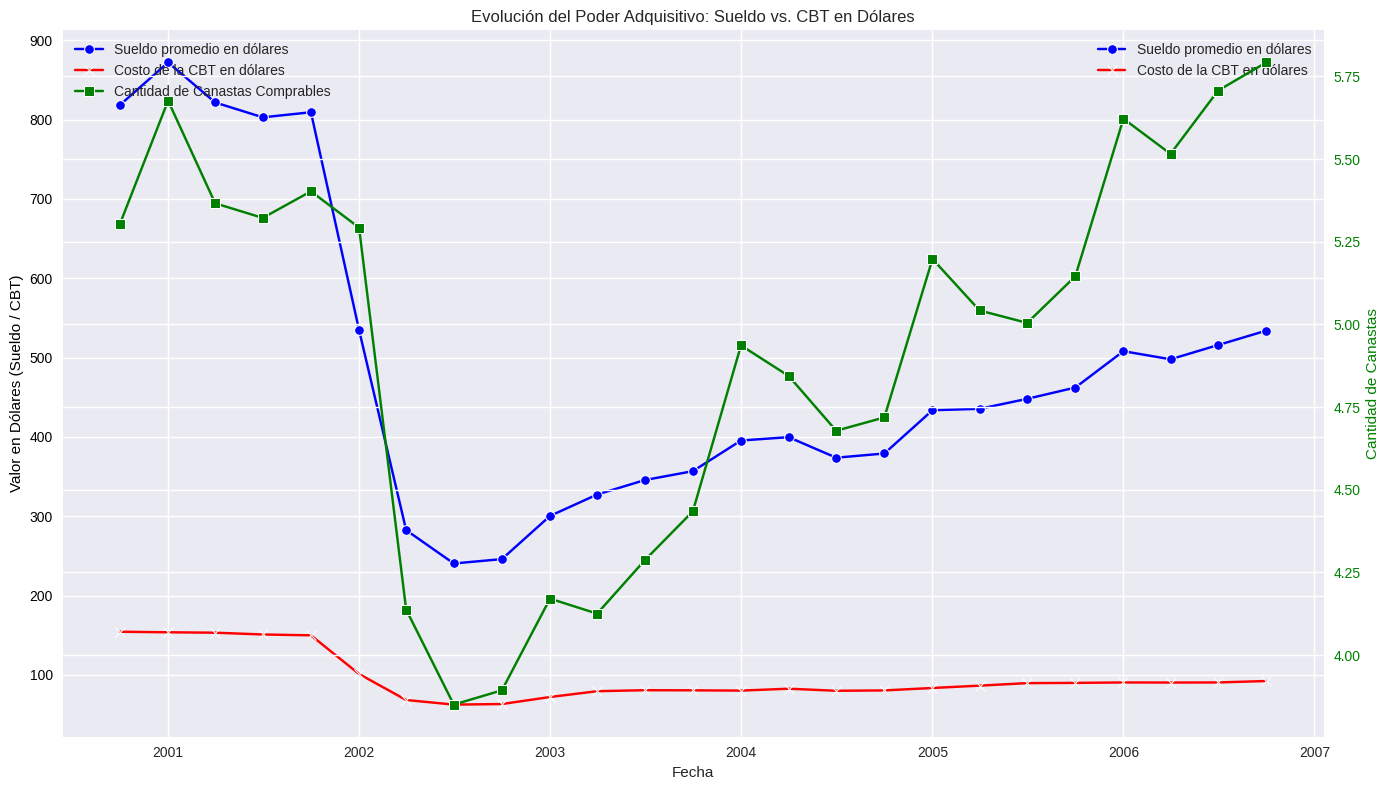


Tabla de Datos del Análisis Final (df_analisis_final):


,fecha_x,sueldo_dolares,CBT_dolares,cantidad_canastas
0,2000-10-01,818.51,154.31,5.30
1,2001-01-01,872.13,153.63,5.68
2,2001-04-01,821.64,153.11,5.37
3,2001-07-01,802.91,150.86,5.32
4,2001-10-01,809.34,149.81,5.40
5,2002-01-01,534.72,101.03,5.29
6,2002-04-01,282.43,68.26,4.14
7,2002-07-01,240.37,62.43,3.85
8,2002-10-01,245.89,63.15,3.89
9,2003-01-01,300.35,72.01,4.17


In [ ]:
# Gáficos finales comparativos.

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Crea una figura y un objeto de ejes primario utilizando plt.subplots()
fig, ax1 = plt.subplots(figsize=(14, 8))

# 2. Traza la serie sueldo_dolares en el eje Y primario
sns.lineplot(x='fecha_x', y='sueldo_dolares', data=df_analisis_final, marker='o', ax=ax1, color='blue', label='Sueldo promedio en dólares')

# 3. Traza la serie CBT_dolares en el mismo eje Y primario
sns.lineplot(x='fecha_x', y='CBT_dolares', data=df_analisis_final, marker='x', ax=ax1, color='red', label='Costo de la CBT en dólares')

# Configurar el eje Y primario
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Valor en Dólares (Sueldo / CBT)', color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True)

# 4. Crea un eje Y secundario
ax2 = ax1.twinx()

# 5. Traza la serie cantidad_canastas en el eje Y secundario
sns.lineplot(x='fecha_x', y='cantidad_canastas', data=df_analisis_final, marker='s', ax=ax2, color='green', label='Cantidad de Canastas Comprables')

# Configurar el eje Y secundario
ax2.set_ylabel('Cantidad de Canastas', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# 6. Establece el título del gráfico y la leyenda
plt.title('Evolución del Poder Adquisitivo: Sueldo vs. CBT en Dólares')

# Combinar leyendas
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')


# 7. Muestra el gráfico
plt.tight_layout()
plt.show()

print('\nTabla de Datos del Análisis Final (df_analisis_final):')
display(df_analisis_final[['fecha_x', 'sueldo_dolares', 'CBT_dolares', 'cantidad_canastas']].round(2))